### Importing the libraries

In [479]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import seaborn as sns

## Gathering the Data

### importing the twitter archive enchanced data

In [480]:
twitter_enchanced = pd.read_csv('twitter-archive-enhanced-2.csv')

### Downloading the Tweet Image Predictions

In [481]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response =requests.get(url)
with open('image-predictions.tsv','wb') as file:
    for line in response:
        file.write(line)

### Getting Tweet Data from Twitter API

##### Converting the txt file to a data list where each element contains one place of tweet info

In [482]:
df_list = []
with open('tweet-json') as file:
    for line in file:
        df_list.append(json.loads(line))


In [483]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

#### creating a dataframe from the list that contains the ,retweet count,and favourite count

In [484]:
tw_data = pd.DataFrame(df_list,columns=['id','retweet_count','favorite_count'])

In [485]:
tw_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Changing the name of the id column to tweet_id

In [486]:
tw_data = tw_data.rename(columns={'id':'tweet_id'})

In [487]:
tw_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Save the dataframe in a csv format for future refrencing

In [488]:
tw_data.to_csv('tw_data.csv',index=False)


#### Checking wheather the csv file was saved 

In [489]:
x=pd.read_csv('tw_data.csv')
x.head

<bound method NDFrame.head of                 tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
...                  ...            ...             ...
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]>

## Accessing the Data

#### Visually and programmatically for quality and tidiness issues

##### A.Assessing Enchanced Twitter Archive Data

In [490]:
twitter_enchanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Taking the sample of the enchanced data

In [491]:

twitter_enchanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1386,700518061187723268,NaN,NaN,2016-02-19 03:11:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vincent. He's the man your girl is wit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700518061...,10,10,Vincent,None,None,None,None
1756,678767140346941444,NaN,NaN,2015-12-21 02:41:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mia. She makes awful decisions. 8/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678767140...,8,10,Mia,None,None,None,None
1323,706265994973601792,NaN,NaN,2016-03-05 23:51:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kara. She's been trying to solve that ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706265994...,11,10,Kara,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085...,9,10,a,None,None,None,None
2112,670435821946826752,NaN,NaN,2015-11-28 02:55:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two unbelievably athletic dogs here. Great for...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670435821...,10,10,None,None,None,None,None


In [492]:
twitter_enchanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [493]:
twitter_enchanced.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [494]:
twitter_enchanced[twitter_enchanced.rating_numerator < 10].count()[0]

440

#### Checking which IDs have numerator with less 10

In [495]:

twitter_enchanced[twitter_enchanced.rating_numerator<10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

In [496]:
twitter_enchanced.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

#### Checking which IDs have denominator with a 0 value

In [497]:

twitter_enchanced[twitter_enchanced.rating_denominator==0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

In [498]:
twitter_enchanced[twitter_enchanced.rating_denominator != 10].count()[0]

23

### B. Accessing the Tweet Image Predictions

In [499]:
image_p = pd.read_csv('image-predictions.tsv',sep='\t')
image_p.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [500]:
image_p.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1522,788070120937619456,https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg,1,golden_retriever,0.735163,True,Sussex_spaniel,0.064897,True,Labrador_retriever,0.047704,True
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
1684,814153002265309185,https://pbs.twimg.com/media/C0xz04SVIAAeyDb.jpg,1,golden_retriever,0.490068,True,Labrador_retriever,0.291956,True,chow,0.072475,True
622,680497766108381184,https://pbs.twimg.com/media/CXGdG0aWcAEbOO1.jpg,1,Chihuahua,0.538354,True,muzzle,0.084289,False,ski_mask,0.076690,False
1157,733482008106668032,https://pbs.twimg.com/media/Ci3Z_idUkAA8RUh.jpg,1,French_bulldog,0.619382,True,computer_keyboard,0.142274,False,mouse,0.058505,False


In [501]:
image_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### C.Assessing Twitter API Data

In [502]:
tw_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [503]:
tw_data.sample(5)

,tweet_id,retweet_count,favorite_count
936,753294487569522689,1191,3758
1082,738402415918125056,955,3599
939,752932432744185856,7798,13970
835,767754930266464257,6221,17814
1591,686386521809772549,996,3553


In [504]:
tw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Tidiness


##### 1. Dog stage data is seperated into 4 columns
##### 2. All data is related but divided into 3 seperate DataFrame

## Quality

### Enchanced Twitter Archieve

###### 1. There are 181 retweets as indicated by retweeted_status_id
###### 2. invalid timestamp data type (string instead of datetime)
###### 3. invalid tweet_id data type (integer instead of string)
###### 4.some dog names are invalid (like : None, a, an, & inplace of name)
###### 5. 440 rating numerators less than 10 (eg. 462)
###### 6. Row 313 has 0 denominator
###### 7. 23 rating denominator not equal to 10

### B. Tweet Image Prediction

###### 1.Missing photos for some IDs (2075 rows instead of 2354)
###### 2.Underscores are used in multi-word names in columns p1,p2, and p3 instead of spaces
###### 3.Some p names start with an uppercase letter while others start with lowercase

### C.Tweets Data From Twittter API

##### 1.Missing entries (only 2354 entries instead of 2356)

## Data Cleaning

#### Create a copy for the Dataframe

In [505]:
twitter_enchanced_clean = twitter_enchanced.copy()
image_p_clean = image_p.copy()
tw_data_clean = tw_data.copy()


### Cleaning Tidiness Issues 

##### Merging the four columns into one,naming dog_stage

In [506]:
twitter_enchanced_clean['dog_stage'] = twitter_enchanced_clean['text'].str.extract("(doggo|floofer|pupper|puppo)")

##### Droping unwanted columns

In [507]:
twitter_enchanced_clean = twitter_enchanced_clean.drop(columns=['doggo','floofer','pupper','puppo'])

### Test

In [508]:
twitter_enchanced_clean.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

### All the data is related but divided into seperated dataframe

### Define

##### Merge all dataframe into 1 based tweet_id

##### Merging the twitter_enchanced_clean with the tweeter API

In [509]:

clean_tw_archive = pd.merge(twitter_enchanced_clean,tw_data_clean,on='tweet_id',how='left')

#### Merging the resuling merged archive with the tweet image prediction

In [510]:
clean_t_archive = pd.merge(clean_tw_archive,image_p_clean,on='tweet_id',how='left')

##### Test

In [511]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

#### C.Cleaning Quality issues

#### Not all quality issues will be cleaned since such data will not be used for analysis

#### Delete rows that represent retweets and all retweeted column

In [512]:
clean_t_archive = clean_t_archive[clean_t_archive.retweeted_status_id.isnull()]
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  dog_stage                   364 n

#### Delete related coulumn

In [513]:
clean_t_archive = clean_t_archive.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

In [514]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  dog_stage              364 non-null    object 
 11  retweet_count          2175 non-null   float64
 12  favorite_count         2175 non-null   float64
 13  jpg_url                1994 non-null   object 
 14  img_num                1994 non-null   float64
 15  p1  

#### Q2.Some dog names are invalid(None,a,an,& the instead of name)

##### convert invalid names (None or starting with lower case letters) to NaN and extract the correct names

In [515]:
clean_t_archive.name = clean_t_archive.name.replace(regex=['^[a-z]+','None'],value=np.nan)
sum(clean_t_archive.name.isnull())

784

##### Declare a function to extract names from text column , return NaN if there's no named word

In [516]:
def function(text):
    txt_list=text.split()
    for word in txt_list:
        if word.lower() == 'named':
            name_index=txt_list.index(word) + 1
            return txt_list[name_index]
        else:
            pass
    return np.nan

In [517]:
clean_t_archive.name = np.where(clean_t_archive.name.isnull(),clean_t_archive.text.apply(function),clean_t_archive.name)

### Test

In [518]:
clean_t_archive.name.isnull().sum()

761

#### Q3.Invalid tweet_id data_type(integer instead of string)

##### correct invalid data type by cconverting tweet_id.astype(str)

In [519]:
clean_t_archive.tweet_id=clean_t_archive.tweet_id.astype(str)

In [520]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   object 
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   1414 non-null   object 
 10  dog_stage              364 non-null    object 
 11  retweet_count          2175 non-null   float64
 12  favorite_count         2175 non-null   float64
 13  jpg_url                1994 non-null   object 
 14  img_num                1994 non-null   float64
 15  p1  

#### Q4.Invalid timestamp to datetype(string not datetime)


In [521]:
clean_t_archive.timestamp = pd.to_datetime(clean_t_archive.timestamp)

In [522]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   1414 non-null   object             
 10  dog_stage              364 non-null    object             
 11  retweet_count          2175 non-null   float64          

##### B.Q1 Missing photos for some IDs(2075 rows instead of 2356)

##### Delete rows with missing photos

In [523]:
clean_t_archive = clean_t_archive[clean_t_archive.jpg_url.notnull()]

In [524]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1373 non-null   object             
 10  dog_stage              326 non-null    object             
 11  retweet_count          1994 non-null   float64          

#### Replace underscore with space in multi-word columns p1,p2,p3

In [525]:
clean_t_archive.p1 = clean_t_archive.p1.str.replace("_",' ')
clean_t_archive.p2 = clean_t_archive.p2.str.replace("_",' ')
clean_t_archive.p3 = clean_t_archive.p3.str.replace("_",' ')

In [526]:
clean_t_archive.p1.head()

0         orange
1      Chihuahua
2      Chihuahua
3    paper towel
4         basset
Name: p1, dtype: object

In [527]:
clean_t_archive.p2.head()

0                 bagel
1              Pekinese
2              malamute
3    Labrador retriever
4      English springer
Name: p2, dtype: object

In [528]:
clean_t_archive.p3.head()

0                         banana
1                       papillon
2                         kelpie
3                        spatula
4    German short-haired pointer
Name: p3, dtype: object

### C.Q1 Missing entities(Only 2354 entries instead of 2356)

#### Delete rows without retweet_count entities

In [529]:
sum(clean_t_archive.retweet_count.isnull())

0

#### 5.Storing Data

In [530]:
clean_t_archive.to_csv('tw_archive_merge.csv')

##### 6.Data Analysis and Visualisation

##### A.The percentage of different dog stages

In [531]:
stage_df = clean_t_archive.dog_stage.value_counts()
stage_df

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_stage, dtype: int64

#### Create a pie chart

(-1.1843354479570871,
 1.4181703555081837,
 -1.3332815068549735,
 1.2056899407062442)

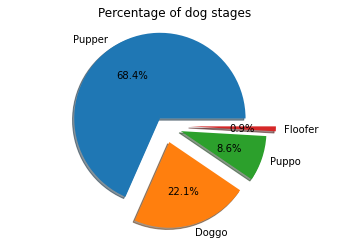

In [532]:
plt.pie(stage_df,
         labels = ['Pupper','Doggo','Puppo',"Floofer"],
         autopct='%1.1f%%',
         shadow = True,
         explode=(0.1,0.2,0.2,0.3)      
)
plt.title('Percentage of dog stages')
plt.axis('equal')

##### insights
#####  1. Pupper has the highest percentage
#####  2.Floofer haas the lowest percentage

##### B. Relationship between retweet count and favorite count


In [533]:
def labels(x,y,z):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(z)
    plt.show()


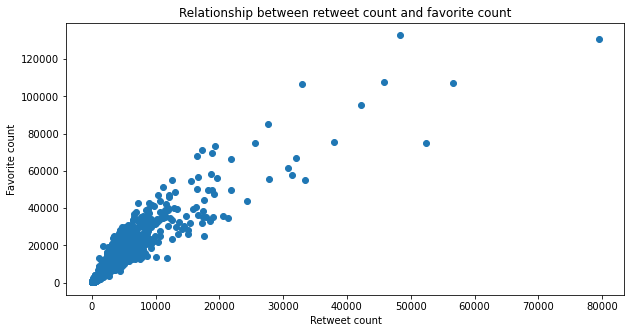

In [534]:
plt.figure(figsize=(10,5))
plt.scatter(clean_t_archive.retweet_count,clean_t_archive.favorite_count)
labels('Retweet count','Favorite count','Relationship between retweet count and favorite count')

In [478]:
#### Insights: It appears there's linear relationship between both parameter